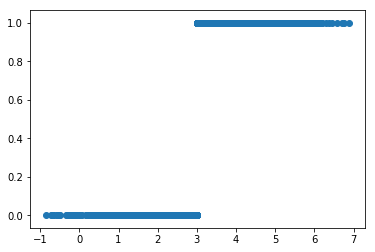

(1000, 0.53739035)
(2000, 0.56739128)
(3000, 0.53805405)
(4000, 0.54853714)
(5000, 0.52982038)
(6000, 0.57019776)
(7000, 0.54120064)
(8000, 0.52980065)
(9000, 0.56778741)
(10000, 0.53032255)
X: [[ 4.3775835 ]
 [ 5.50739193]
 [ 2.97093725]
 [ 3.94020581]
 [ 3.30920434]
 [ 1.87958407]
 [ 2.27029061]
 [ 2.49734306]
 [ 4.11851883]
 [ 3.57543063]]
Y: [[ 0.99997926]
 [ 0.99997926]
 [ 0.        ]
 [ 0.99997926]
 [ 0.99997926]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.99997926]
 [ 0.99997926]]


In [12]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

batch_size = 100
learning_rate = 0.1


x = tf.placeholder(tf.float32, shape=(None, 1))
y_ = tf.placeholder(tf.float32, shape=(None, 1))

#"""
w1 = tf.Variable(tf.random_normal([1, 3], stddev=0.1))
b1 = tf.Variable(tf.random_normal([3], stddev=0.1))
w2 = tf.Variable(tf.random_normal([3, 2], stddev=0.1))
b2 = tf.Variable(tf.random_normal([2], stddev=0.1))
w3 = tf.Variable(tf.random_normal([2, 1], stddev=0.1))
b3 = tf.Variable(tf.random_normal([1], stddev=0.1))


L1 = tf.nn.relu(tf.matmul(x, w1) + b1)
L2 = tf.nn.relu(tf.matmul(L1, w2) + b2)
y = tf.nn.sigmoid(tf.matmul(L2, w3) + b3)
"""

w = tf.Variable(tf.random_normal([1], stddev=0.1))
b = tf.Variable(tf.random_normal([1], stddev=0.1))
y = tf.nn.sigmoid(x*w + b)
"""
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_, logits=tf.clip_by_value(y, 1e-8, 1.0))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

##data
size = 10000
X = [np.float32(i) for i in np.random.normal(3, 1, size)]
Y = [ 1. if m>3 else 0. for m in X ]
plt.scatter(X, Y)
plt.show()
X = np.array(X).reshape(size, 1)
Y = np.array(Y).reshape(size, 1)


with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(10000):
        start = (epoch*batch_size)%size
        end = min(start+batch_size, size)
        #print start, end
        sess.run(optimizer, feed_dict={x:X[start:end], y_:Y[start:end]})
        
        if epoch%1000 == 999:
            print(epoch+1, sess.run(tf.reduce_mean(loss), feed_dict={x:X[start:end], y_:Y[start:end]}))
    print "X:", X[0:10]
    print "Y:", sess.run(y, feed_dict={x:X[0:10]}) 
    """
    p = np.linspace(-5, 5, 100)
    W = np.float32(sess.run(w))
    B = np.float32(sess.run(b))
    q = sess.run(tf.nn.sigmoid(p * W + B))
    plt.plot(p, q)
    """